In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv('SocmedAddict.csv')
df.columns
df[['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night']].head()

Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night
0                    5.2                    6.5
1                    2.1                    7.5
2                    6.0                    5.0
3                    3.0                    7.0
4                    4.5                    6.0

In [6]:
df[['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night']].describe()

Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night
count             705.000000             705.000000
mean                4.918723               6.868936
std                 1.257395               1.126848
min                 1.500000               3.800000
25%                 4.100000               6.000000
50%                 4.800000               6.900000
75%                 5.800000               7.700000
max                 8.500000               9.600000

In [17]:
X = df[['Avg_Daily_Usage_Hours']]
y = df['Sleep_Hours_Per_Night']

model = LinearRegression()
model.fit(X, y)
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

Slope: -0.70850180806157
Intercept: 10.35386059548242


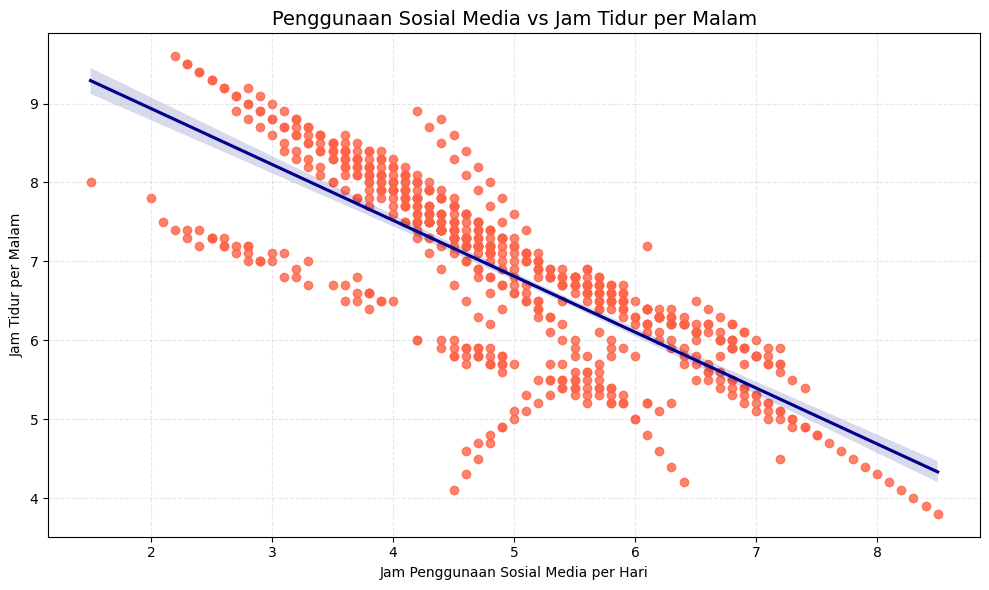

In [16]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x=df[['Avg_Daily_Usage_Hours']],
    y=df['Sleep_Hours_Per_Night'],
    data=df,
    color='tomato',
    line_kws={'color': 'darkblue'}
)
plt.title('Penggunaan Sosial Media vs Jam Tidur per Malam', fontsize=14)
plt.xlabel('Jam Penggunaan Sosial Media per Hari')
plt.ylabel('Jam Tidur per Malam')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

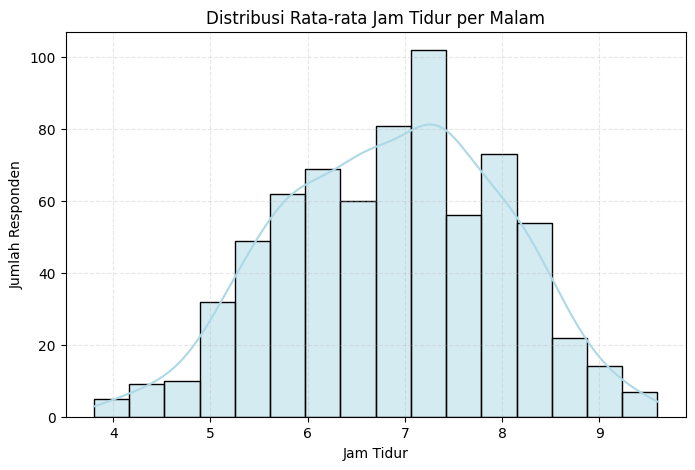

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sleep_Hours_Per_Night'], kde=True, color='lightblue')
plt.title('Distribusi Rata-rata Jam Tidur per Malam')
plt.xlabel('Jam Tidur')
plt.ylabel('Jumlah Responden')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

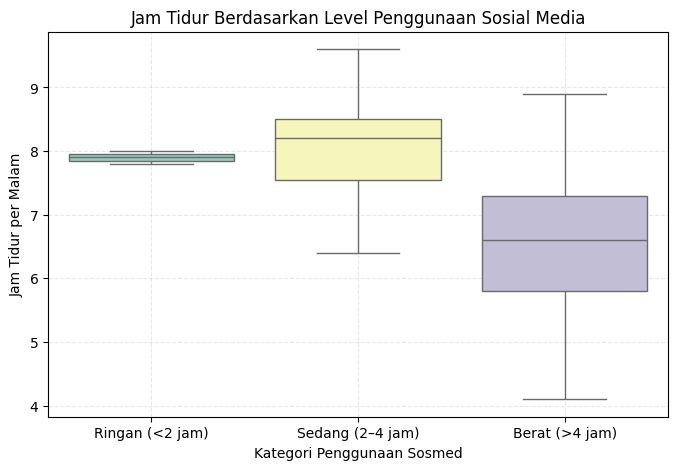

In [12]:
df['Usage_Level'] = pd.cut(
    df['Avg_Daily_Usage_Hours'],
    bins=[0, 2, 4, 7.5],
    labels=['Ringan (<2 jam)', 'Sedang (2â€“4 jam)', 'Berat (>4 jam)']
)

plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Usage_Level',
    y='Sleep_Hours_Per_Night',
    hue='Usage_Level',
    data=df,
    palette='Set3',
    legend=False
)
plt.title('Jam Tidur Berdasarkan Level Penggunaan Sosial Media')
plt.xlabel('Kategori Penggunaan Sosmed')
plt.ylabel('Jam Tidur per Malam')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()
